In [143]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# 파이썬을 구동하는 폴더내 엑셀파일을 저장해주어야 한다
load_filename = 'df_date_charge.csv'
data = pd.read_csv(load_filename,encoding='CP949')

In [144]:
data['날짜'] = pd.to_datetime(data['날짜'], format ='%Y-%m-%d')

In [145]:
data.rename(columns={'날짜':'측정일시'},inplace=True)

Text(0.5, 1.0, 'promissory note')

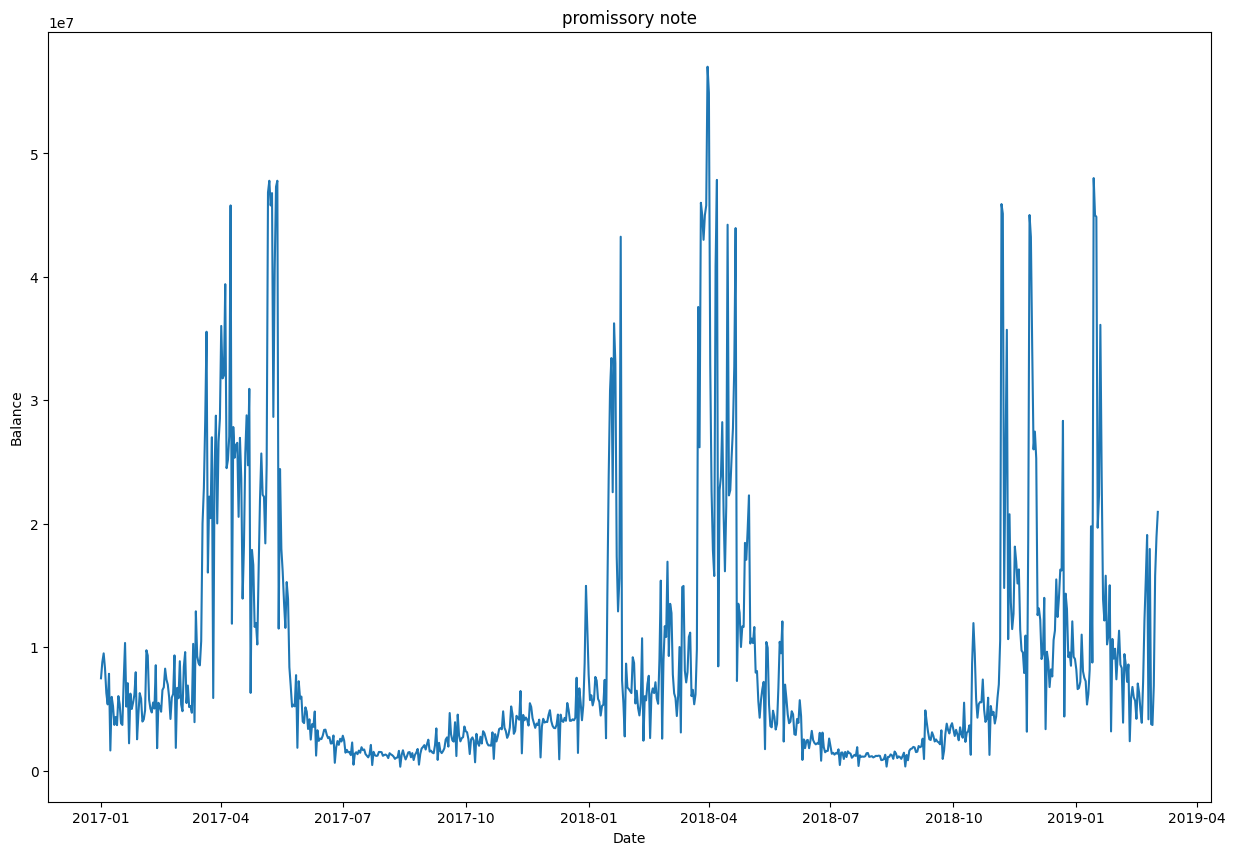

In [146]:
data_pn = data[['측정일시','금액']]
data_pn.rename(columns={'측정일시':'Date','금액':'total'}, inplace=True)


plt.figure(figsize=(15,10))
x = data_pn['Date'].to_list()

y =data_pn['total'].to_list() 
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Balance')
plt.title("promissory note")

In [147]:
from statsmodels.tsa.api import ExponentialSmoothing

In [148]:
data_pn

,Date,total
0,2017-01-01,7482160
1,2017-01-02,8796124
2,2017-01-03,9500876
3,2017-01-04,8284787
4,2017-01-05,6283747
...,...,...
787,2019-02-27,3698369
788,2019-02-28,6872981
789,2019-03-01,15795477
790,2019-03-02,18917615


In [149]:
data_pn.sort_values(by='total')

,Date,total
224,2017-08-13,319521
588,2018-08-12,329823
602,2018-08-26,338768
567,2018-07-22,381659
203,2017-07-23,455576
...,...,...
126,2017-05-07,47783544
461,2018-04-07,47852539
743,2019-01-14,48000000
455,2018-04-01,54898579


In [151]:
data_pn.set_index('Date',inplace=True)

In [152]:
df_train=data_pn
df=data_pn

In [128]:
# from collections import Counter

# def detect_outliers(df, n, features):
#     outlier_indices = []
#     for col in features:
#         Q1 = np.percentile(df[col], 25)
#         Q3 = np.percentile(df[col], 75)
#         IQR = Q3 - Q1
        
#         outlier_step = 1.5 * IQR
        
#         outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
#         outlier_indices.extend(outlier_list_col)
#     outlier_indices = Counter(outlier_indices)
#     multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
        
#     return multiple_outliers
        
# Outliers_to_drop = detect_outliers(df_train, 2, ["total"])

In [153]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

In [154]:
# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=df, column='total', weight=1.5)
outlier_idx

DatetimeIndex(['2017-03-19', '2017-03-20', '2017-03-21', '2017-03-23',
               '2017-03-25', '2017-03-27', '2017-03-28', '2017-03-30',
               '2017-03-31', '2017-04-01', '2017-04-02', '2017-04-03',
               '2017-04-04', '2017-04-05', '2017-04-06', '2017-04-07',
               '2017-04-08', '2017-04-10', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-15', '2017-04-16', '2017-04-19',
               '2017-04-20', '2017-04-21', '2017-04-22', '2017-04-30',
               '2017-05-01', '2017-05-02', '2017-05-03', '2017-05-05',
               '2017-05-06', '2017-05-07', '2017-05-08', '2017-05-09',
               '2017-05-10', '2017-05-11', '2017-05-12', '2017-05-13',
               '2017-05-15', '2018-01-16', '2018-01-17', '2018-01-18',
               '2018-01-19', '2018-01-20', '2018-01-21', '2018-01-25',
               '2018-03-24', '2018-03-25', '2018-03-26', '2018-03-27',
               '2018-03-28', '2018-03-29', '2018-03-30', '2018-03-31',
      

In [156]:
df.loc[outlier_idx]=30000000

# df.drop(outlier_idx, axis=0, inplace=True)
df.loc[outlier_idx]

,total
Date,
2017-03-19,30000000
2017-03-20,30000000
2017-03-21,30000000
2017-03-23,30000000
2017-03-25,30000000
...,...
2019-01-15,30000000
2019-01-16,30000000
2019-01-18,30000000


In [157]:
df.sort_values(by='total')

,total
Date,
2017-08-13,319521
2018-08-12,329823
2018-08-26,338768
2018-07-22,381659
2017-07-23,455576
...,...
2017-04-13,30000000
2017-04-12,30000000
2017-04-10,30000000


In [158]:
data_pn=df

In [270]:
train = data_pn[0:600]
test = data_pn [600:]

In [271]:
y_hat = test.copy()

<AxesSubplot: xlabel='Date'>

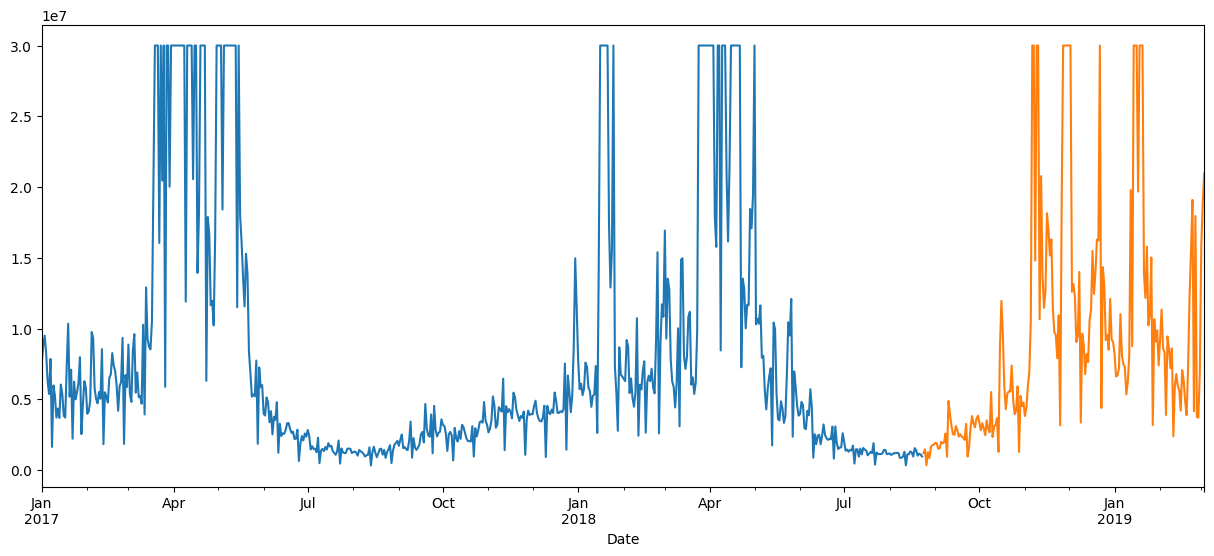

In [272]:
train['total'].plot(figsize=(15,6))
test['total'].plot()

In [279]:
# 파라미터로 seasonality 주기를 넘겨줘야함
model = ExponentialSmoothing(
  np.array(train['total']),seasonal_periods=300,
  trend='add',
  seasonal ='add'
  )

In [280]:
winter_result = model.fit()

C:\Users\king\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [281]:
y_hat['winter']= winter_result.forecast(len(test))

In [282]:
len(test)

192

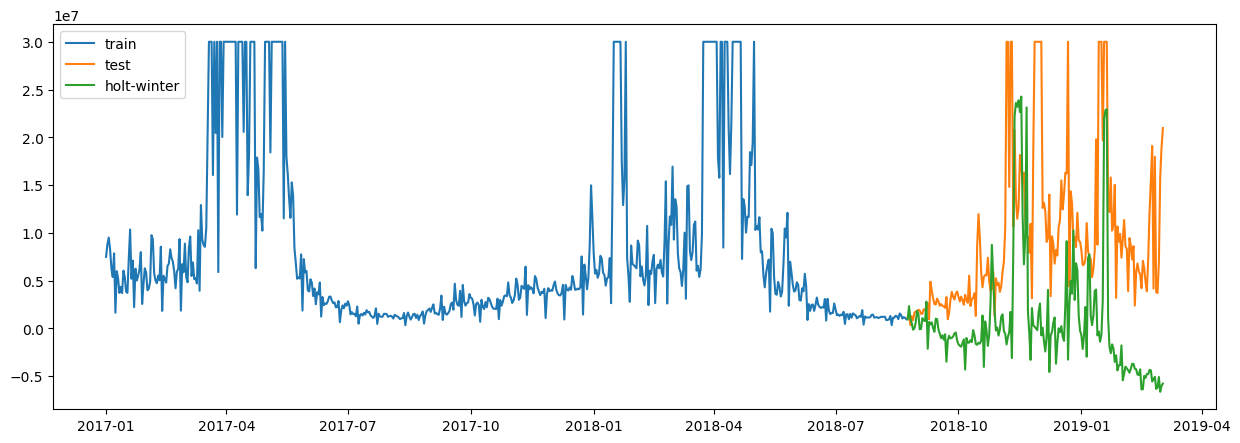

In [283]:
plt.figure(figsize=(15,5))
plt.plot(train['total'], label='train')
plt.plot(test['total'], label='test')
plt.plot(y_hat['winter'], label= 'holt-winter')
plt.legend()

In [284]:
from sklearn.metrics import mean_squared_error 

rmse= np.sqrt(mean_squared_error(test['total'],y_hat['winter']))
rmse

12415151.143095879